# World Happiness Report

Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


Solution-You need to predict the happiness score considering all the other factors mentioned in the dataset

In [38]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [8]:
df = pd.read_csv("happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
df.shape

(158, 12)

In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null value present in the datasets.

<AxesSubplot:>

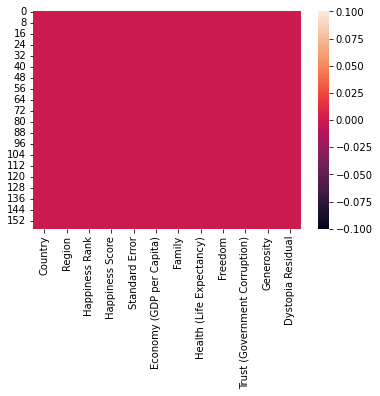

In [12]:
# Using the heatmap to plot the data 
sns.heatmap(df.isnull())

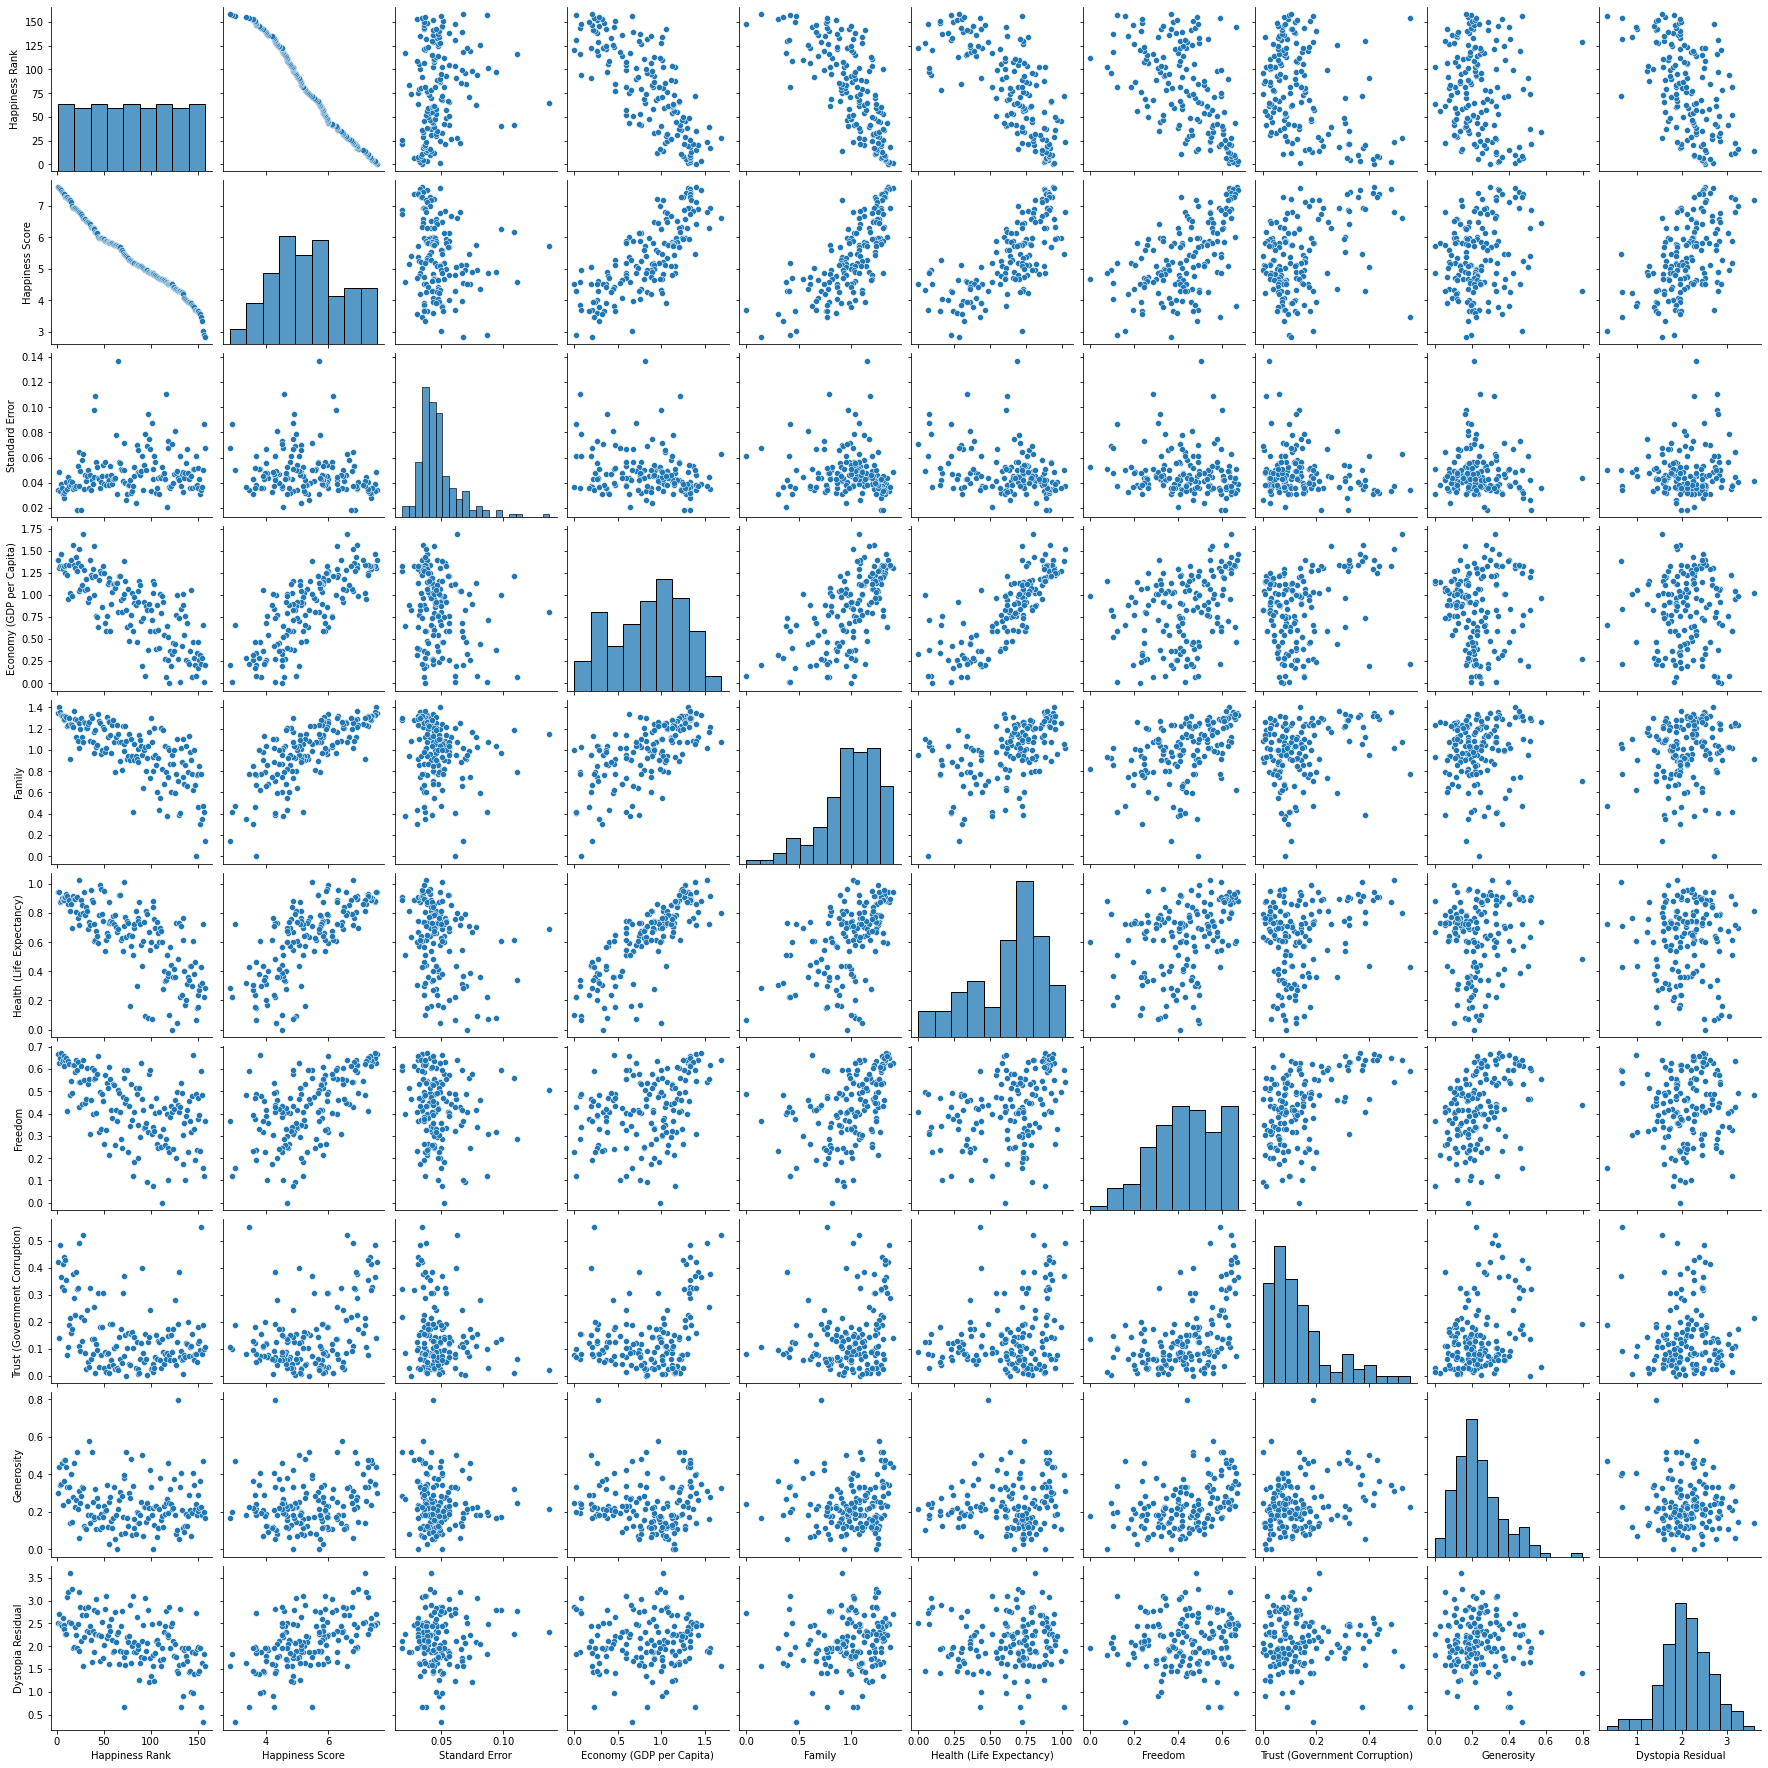

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='Country', ylabel='Economy (GDP per Capita)'>

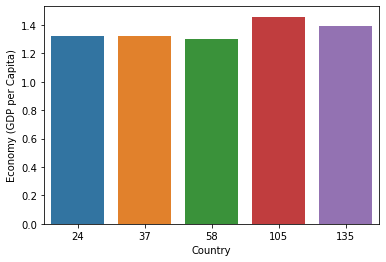

In [39]:
sns.barplot(x=df['Country'].head(),y=df['Economy (GDP per Capita)'],data=df)

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

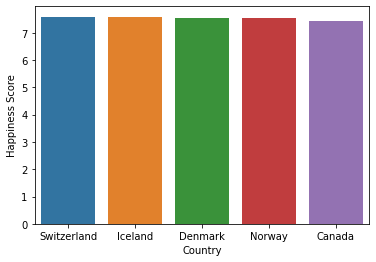

In [15]:
sns.barplot(x=df['Country'].head(),y=df['Happiness Score'],data=df)

In [16]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
LBL = LabelEncoder()
df['Country']= LBL.fit_transform(df['Country'])
df['Region']= LBL.fit_transform(df['Region'])

In [18]:
df['Country']

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32

In [19]:
df['Region']

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int32

In [20]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [21]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

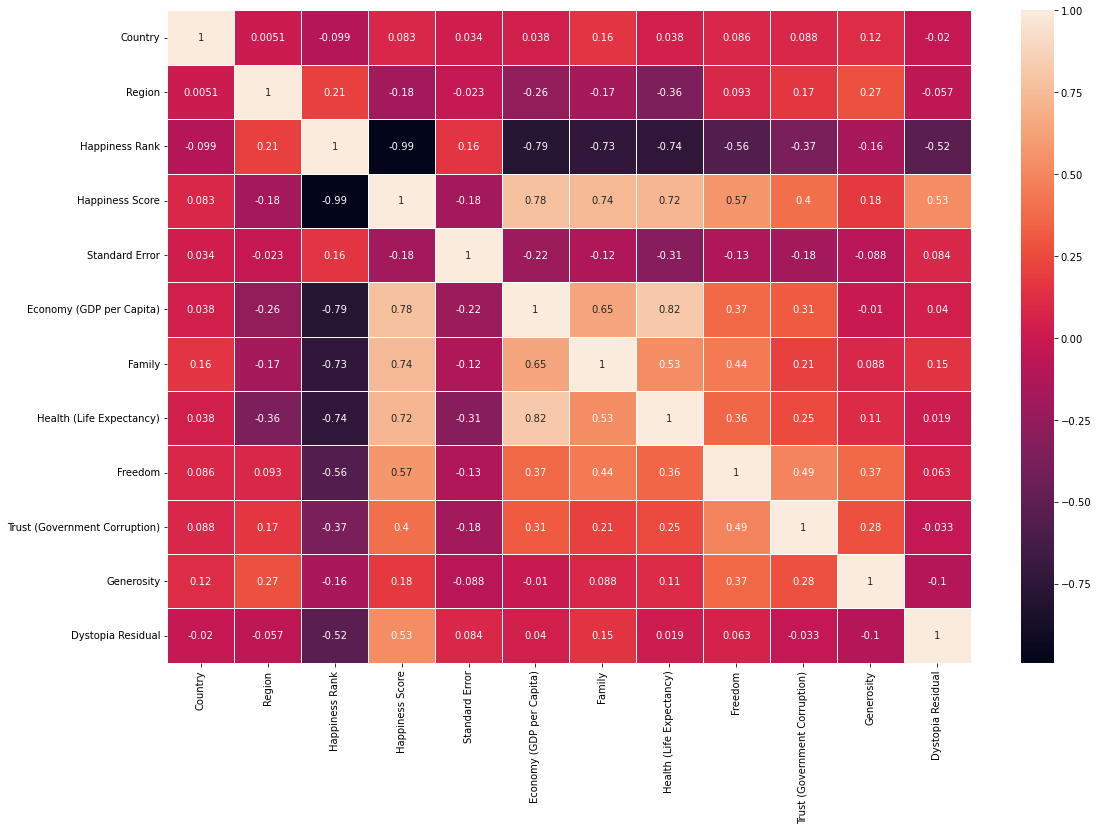

In [22]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(),annot=True,linewidths = .5)

In [23]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

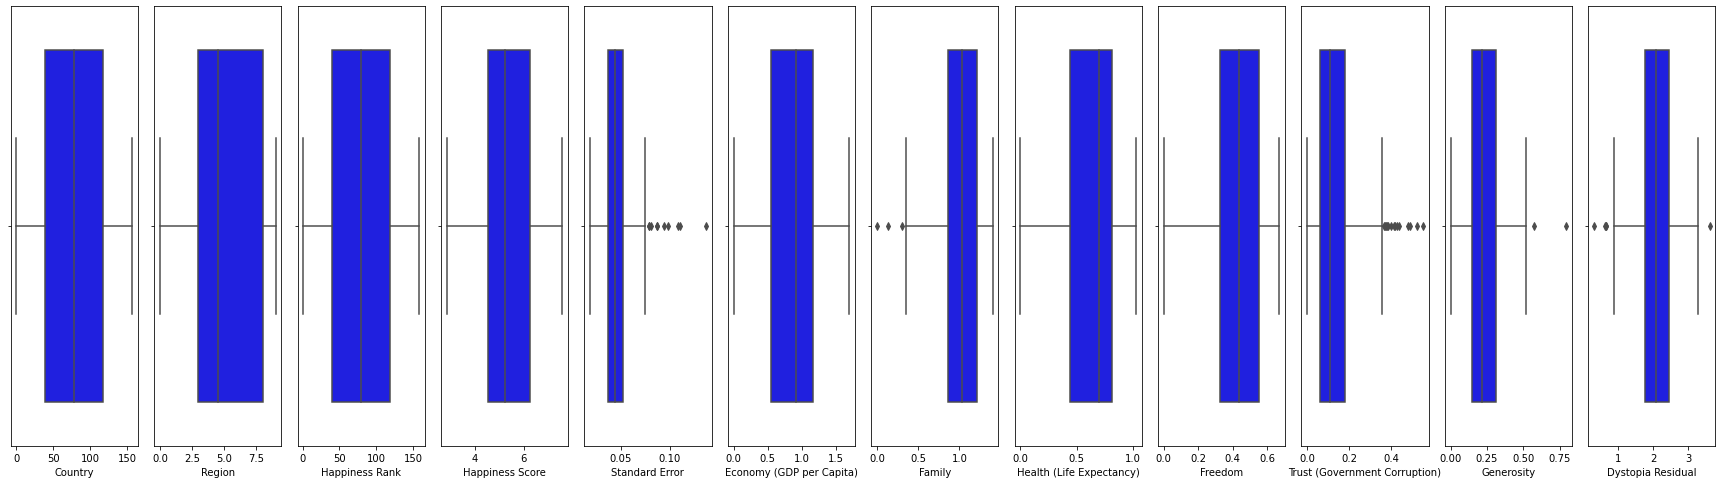

In [24]:
col = df.columns.values
ncol = 15
nrows = 15
plt.figure(figsize=(30,100))
for i in range(0, len(col)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[col[i]],color = 'blue', orient='v')
    plt.tight_layout()

In [25]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

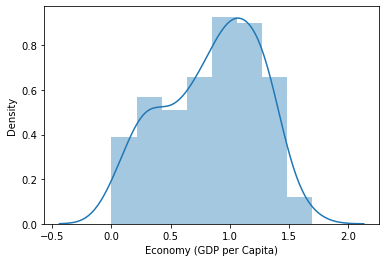

In [26]:
sns.distplot(df['Economy (GDP per Capita)'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

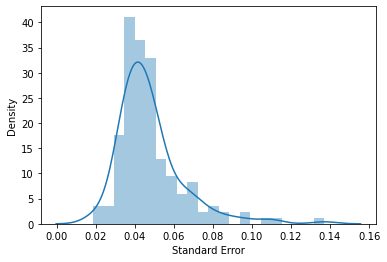

In [27]:
sns.distplot(df['Standard Error'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family', ylabel='Density'>

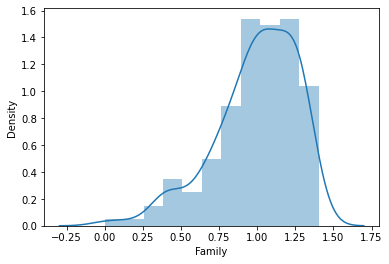

In [28]:
sns.distplot(df['Family'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

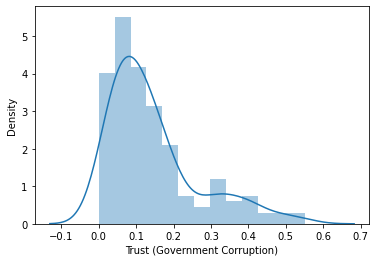

In [29]:
sns.distplot(df['Trust (Government Corruption)'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Generosity', ylabel='Density'>

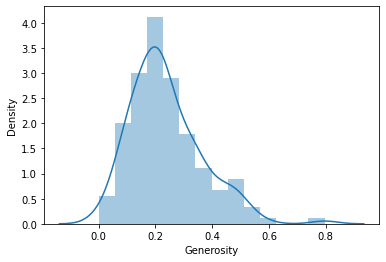

In [30]:
sns.distplot(df['Generosity'])

In [31]:
delete = pd.DataFrame([["-0.177254","Standard Error","No", "Alot"],["0.395199","Trust (Government Corruption)","No","Alot"]],columns = ["Correlation with Target","Column_Name","Normalised","Outliers"])
delete


,Correlation with Target,Column_Name,Normalised,Outliers
0,-0.177254,Standard Error,No,Alot
1,0.395199,Trust (Government Corruption),No,Alot


In [32]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
z.shape

(158, 12)

In [33]:
threshold = 3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [34]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 12)
(149, 12)


In [35]:
loss_percent = (158-154)/158*100
print(loss_percent)

2.5316455696202533


In [36]:
x = df_new.iloc[:,[0,1,2,4,5,6,7,8,9]] 
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957
...,...,...,...,...,...,...,...,...,...
150,66,8,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922
151,20,8,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832
152,0,7,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010


In [37]:
x.shape

(149, 9)

In [40]:
x.shape[1]

9

In [41]:
y = df_new.iloc[:,-1]
y

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
150    1.41723
151    1.46494
152    1.95210
154    1.63328
156    1.83302
Name: Dystopia Residual, Length: 149, dtype: float64

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(X):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features'] = x.columns
    return vif

In [43]:
x = df_new.iloc[:,[0,1,2,4,5,6,7,8,9]]

In [44]:
vif_cal(x)

,VIF Factor,Features
0,4.047927,Country
1,4.741120,Region
2,5.619373,Happiness Rank
3,11.288994,Standard Error
4,24.959564,Economy (GDP per Capita)
5,29.615628,Family
6,24.155598,Health (Life Expectancy)
7,15.692049,Freedom
8,3.852105,Trust (Government Corruption)


In [45]:
df_new.drop(['Family','Freedom','Region'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7576\3792801933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Family','Freedom','Region'],axis=1,inplace=True)


In [46]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method = 'yeo-johnson')
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.4696364 ,
         1.75498234,  1.81762514],
       [-0.30048669,  1.23451354, -1.99584442, ...,  1.5112916 ,
         1.44218195,  0.32967608],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.05346933,
         1.6160368 ,  1.95339957],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -1.35238817,
        -1.26539516, -0.19284339],
       [-1.50728158,  0.95527966,  1.56626337, ..., -1.30970913,
         0.31812329, -0.4344978 ],
       [-1.24683102,  0.95527966,  1.60111233, ..., -1.55066259,
        -1.84989335, -0.14727363]])

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.4696364 ,
         1.75498234,  1.81762514],
       [-0.30048669,  1.23451354, -1.99584442, ...,  1.5112916 ,
         1.44218195,  0.32967608],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.05346933,
         1.6160368 ,  1.95339957],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -1.35238817,
        -1.26539516, -0.19284339],
       [-1.50728158,  0.95527966,  1.56626337, ..., -1.30970913,
         0.31812329, -0.4344978 ],
       [-1.24683102,  0.95527966,  1.60111233, ..., -1.55066259,
        -1.84989335, -0.14727363]])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

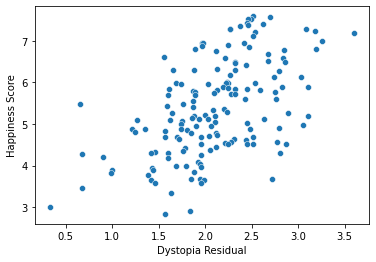

In [48]:
sns.scatterplot(x= 'Dystopia Residual',y = 'Happiness Score',data = df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

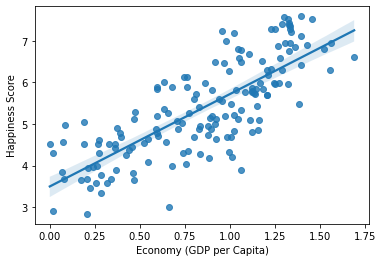

In [49]:
sns.regplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

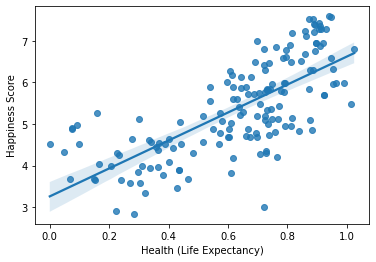

In [50]:
sns.regplot(x = 'Health (Life Expectancy)', y = 'Happiness Score', data = df)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr_model = LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2')
a_score

In [53]:
max_score = 0
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size=0.30)
    lr_model.fit(x_train,y_train)
    pred_test = lr_model.predict(x_test)
    r2_scr = r2_score(y_test,pred_test)
    if r2_scr > max_score:
        max_score = r2_scr
        final_r2_state = i
print("Max r2 score corresponding to", final_r2_state, "is", max_score)

Max r2 score corresponding to 477 is 0.965680092897629


In [54]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([0.88267397, 0.91939711, 0.89096054, 0.8364087 , 0.8209815 ])

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 279,test_size=.30)
lr_model.fit(x_train,y_train)
pred_test = lr_model.predict(x_test)
pred_test
print("RMSE :", np.sqrt(mean_squared_error(y_test,pred_test)))

print("r2_score :",r2_score(y_test,pred_test))

RMSE : 0.13904154632615806
r2_score : 0.878415051962454


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [57]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred_test = m.predict(x_test)
    print("r2_score of",m, ":",r2_score(y_test,pred_test))
    print('mean_squared_error',mean_squared_error(y_test,pred_test))
    print('mean_absolute_error',mean_absolute_error(y_test,pred_test))
    print('\n')

r2_score of RandomForestRegressor() : 0.719462471890671
mean_squared_error 0.04460672416106292
mean_absolute_error 0.17214079777777777


r2_score of SVR() : 0.8066008487746106
mean_squared_error 0.030751331737451634
mean_absolute_error 0.1410126265789259


r2_score of DecisionTreeRegressor() : -0.23635789773327565
mean_squared_error 0.19658644631333336
mean_absolute_error 0.32808511111111116


r2_score of AdaBoostRegressor() : 0.6336085004549225
mean_squared_error 0.058257890362519354
mean_absolute_error 0.19877562429944645




In [58]:
import joblib

joblib.dump(lr_model,'lrmodel.obj')
lrloadmodel = joblib.load('lrmodel.obj')

In [59]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lrloadmodel.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,1.80101,1.619135
1,1.76145,1.976092
2,1.68135,1.656914
3,1.57059,1.552407
4,2.21978,2.246793
5,2.43872,2.556565
6,2.83600,2.723125
7,2.24639,2.411510
8,2.53320,2.404206
9,2.51011,2.538774
